# Notebook to Start Pulling it All Together

## Temperature 5 m and deeper

In [64]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [153]:
def bias(df, obs, mod):
    return len(df), (df[mod] - df[obs]).mean()

In [59]:
def rmse(df, obs, mod):
    return (np.sqrt(((df[mod] - df[obs])**2).mean()))

In [61]:
def swillmott(df, obs, mod):
    meanobs = df[obs].mean()
    return (((df[mod] - df[obs])**2).sum()
            /(( (df[mod] - meanobs).abs() + (df[obs] - meanobs).abs() )**2).sum())

In [210]:
def slope_inter(df, obs, mod):
    X = df[obs]
    y = df[mod]
    X = sm.add_constant(X)

    # Fit and make the predictions by the model
    model = sm.OLS(y, X, missing='drop').fit()
    predictions = model.predict(X)
    
    nonsyst = np.sqrt(((y - predictions)**2).mean())
    systematic = np.sqrt(((predictions - df[obs])**2).mean())
    return model.params[obs], model.params['const'], systematic, nonsyst

In [233]:
def spread(df, obs, mod):
    return 1 - ((df[mod] - df[mod].mean())**2).mean() / ((df[obs] - df[obs].mean())**2).mean() 

In [134]:
def read_pieces(pieces):
    temp1 = pd.read_csv(pieces[0])
    for piece in pieces[1:]:
        nextpiece = pd.read_csv(piece)
        temp1 = pd.concat([temp1, nextpiece], ignore_index=True)
    return temp1

In [234]:
def plot_and_stats(temp1, name):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.hist2d(temp1.CT[temp1.k >= 5], temp1.mod_votemper[temp1.k >= 5], bins=np.arange(4, 20, 0.5), norm=LogNorm());
    number, tbias = bias(temp1[temp1.k >= 5], 'CT', 'mod_votemper')
    trmse = rmse(temp1[temp1.k >= 5], 'CT', 'mod_votemper')
    tswillmott = swillmott(temp1[temp1.k >=5], 'CT', 'mod_votemper')
    m, c, syst, nonsyst = slope_inter(temp1[temp1.k >= 5], 'CT', 'mod_votemper')
    tspread = spread(temp1[temp1.k >= 5], 'CT', 'mod_votemper')
    ax.plot([4, 19.5], [4, 19.5], 'w-');
    ax.plot(np.arange(4, 20, 0.5), c + m*np.arange(4, 20, 0.5), 'r-');
    ax.arrow(5, 16, 0, 1-tbias/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(5, 18, 0, -1+tbias/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(6, 16, 0, 1-syst/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(6, 18, 0, -1+syst/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(7, 16, 0, 1-nonsyst/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(7, 18, 0, -1+nonsyst/2, head_width=0.5, head_length=0.2, length_includes_head=True);
    Cp2 = {'number': number,
            'bias': tbias,
          'rmse': trmse,
          'swillmott': tswillmott,
          'slopedev': 1-m,
          'const': c,
          'systematic': syst,
          'nonsystematic': nonsyst,
          'spread': tspread}
    ax.text(5-0.2, 14, 'bias', rotation=90)
    ax.text(6-0.2, 13, 'systematic', rotation=90)
    ax.text(7-0.2, 12, 'non-systematic', rotation=90)
    ax.set_title(f'{name}, Temperature below 5 m');
    dCp2 = pd.DataFrame(data=Cp2, index=[name])
    return dCp2


In [235]:
pieces = ('/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20150101-20150331.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20150401-20150630.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20150701-20150930.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20151001-20151231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TSPUG_20150101-20151231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20160101-20160331.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20160401-20160630.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20160701-20160930.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20161001-20161231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TSPUG_20160101-20161231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20170101-20170331.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20170401-20170630.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20170701-20170930.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20171001-20171231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TSPUG_20170101-20171231.csv')

,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
Cp2,552175,-0.105918,0.45508,0.032549,0.105152,0.941392,0.173684,0.420632,0.095888


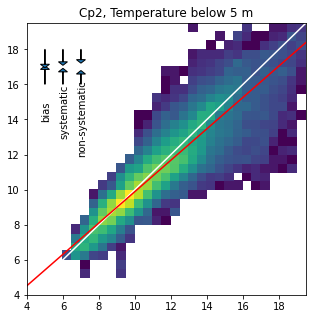

In [236]:
temp1 = read_pieces(pieces)
dCp2 = plot_and_stats(temp1, 'Cp2')
dCp2

In [237]:
pieces = ('/home/sallen/202007/202007D-again/ObsModel_202007D-again_TS_20150101-20150331.csv',
         '/home/sallen/202007/202007D-again/ObsModel_202007D-again_TS_20150401-20150630.csv',
         '/home/sallen/202007/202007D-again/ObsModel_202007D-again_TS_20150701-20150930.csv',
         '/home/sallen/202007/202007D-again/ObsModel_202007D-again_TS_20151001-20151231.csv',
         '/home/sallen/202007/202007D-again/ObsModel_202007D-again_pugts_20150101_20151231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_ctd_20160101_20161231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_pugts_20160101_20161231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_ctd_20170101_20171231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_pugts_20170101_20171231.csv'
        )

,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
Dagain,555128,-0.105961,0.453529,0.032363,0.104881,0.938525,0.173368,0.419085,0.09599


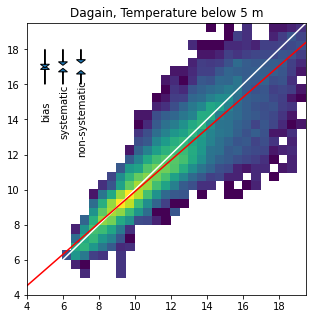

In [238]:
temp3 = read_pieces(pieces)
Dagain = plot_and_stats(temp3, 'Dagain')
Dagain

In [243]:
pieces = ('/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_ctd_20150101_20151231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_pugts_20150101_20151231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_ctd_20160101_20161231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_pugts_20160101_20161231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_ctd_20170101_20171231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_pugts_20170101_20171231.csv',)

,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
D-lowR,559683,-0.10209,0.450698,0.031878,0.10081,0.901671,0.166712,0.418731,0.088763


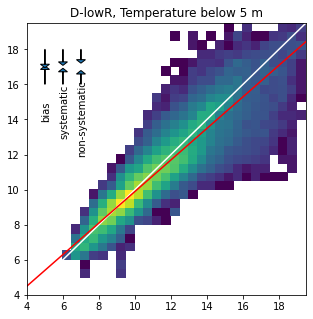

In [244]:
temp2 = read_pieces(pieces)
DlowR = plot_and_stats(temp2, 'D-lowR')
DlowR

In [239]:
pieces = ('/home/sallen/202007/202007F/ObsModel_202007F_ctd_20150101_20151231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_pugts_20150101_20151231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_ctd_20160101_20161231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_pugts_20160101_20161231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_ctd_20170101_20171231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_pugts_20170101_20171231.csv',)

,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
F,559683,-0.067417,0.437647,0.029173,0.070968,0.639205,0.114689,0.422352,0.032344


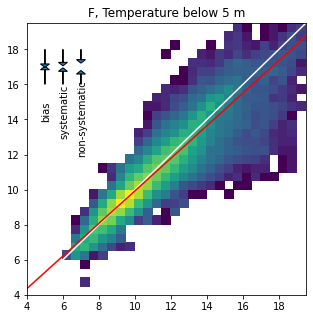

In [240]:
temp2 = read_pieces(pieces)
modF = plot_and_stats(temp2, 'F')
modF

In [245]:
alltogether = pd.concat([dCp2, Dagain, DlowR, modF], axis=0)
foramt = "{:.2}"
alltogether.style.format({'bias': foramt, 'rmse': foramt, 'swillmott': foramt, 'slopedev': foramt, 'const': foramt,
                         'systematic': foramt, 'nonsystematic':foramt, 
                    'spread': foramt}).apply(highlight_max_min)

,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
Cp2,552175,-0.11,0.46,0.033,0.11,0.94,0.17,0.42,0.096
Dagain,555128,-0.11,0.45,0.032,0.1,0.94,0.17,0.42,0.096
D-lowR,559683,-0.1,0.45,0.032,0.1,0.9,0.17,0.42,0.089
F,559683,-0.067,0.44,0.029,0.071,0.64,0.11,0.42,0.032


In [180]:
def color_max_min(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [231]:
def highlight_max_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = abs(s) == abs(s).max()
    is_min = abs(s) == abs(s).min()
    color = []
    for v, v2 in zip(is_max, is_min):
        if v:
            color.append('red')
        elif v2:
            color.append('darkgreen')
        else:
            color.append('black')
    return ['color: %s' % color[i] for i in range(len(is_max))]